# Activity 2.2 - Transfer Learning 

**Name**: Almodiel, Mj Spencer <br>
**Instructor**: Engr Roman Richard 

#### Objective(s):

This activity aims to introduce how to apply transfer learning 

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural network 
* Demonstrate how to apply transfer learning in neural network


#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function

import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Set the parameters

In [28]:
now = datetime.datetime.now
batch_size = 128
num_classes = 5
epochs = 70
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3

Set how the input data is loaded

In [3]:

if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

* Write a function to include all the training steps. 
* Use the model, training set, test set and number of classes as function parameters


In [35]:
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    t = now()
    run_hist = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    return run_hist

Shuffle and split the data between train and test sets

In [5]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()



Create two datasets 
* one with digits below 5
* one with 5 and above

In [6]:
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gte5 = x_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5
x_test_gte5 = x_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5

* Define the feature layers that will used for transfer learning
* Freeze these layers during fine-tuning process

In [7]:

feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

Define the classification layers

In [8]:


classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

Create a model by combining the feature layers and classification layers

In [9]:

model = Sequential(feature_layers + classification_layers)

Check the model summary

In [10]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                        

 Train the  model on the digits 5,6,7,8,9

In [11]:
train_model(model,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Epoch 1/5
230/230 [==============================] - 4s 7ms/step - loss: 1.6230 - accuracy: 0.1766 - val_loss: 1.6055 - val_accuracy: 0.1851
Epoch 2/5
230/230 [==============================] - 1s 5ms/step - loss: 1.6002 - accuracy: 0.2351 - val_loss: 1.5799 - val_accuracy: 0.2929
Epoch 3/5
230/230 [==============================] - 1s 5ms/step - loss: 1.5765 - accuracy: 0.2960 - val_loss: 1.5529 - val_accuracy: 0.4769
Epoch 4/5
230/230 [==============================] - 1s 5ms/step - loss: 1.5508 - accuracy: 0.3633 - val_loss: 1.5233 - val_accuracy: 0.6172
Epoch 5/5
230/230 [==============================] - 1s 5ms/step - loss: 1.5226 - accuracy: 0.4245 - val_loss: 1.4901 - val_accuracy: 0.6768
Training time: 0:00:09.342703
Test score: 1.4900732040405273
Test accuracy: 0.6768154501914978


Freeze only the feature layers

In [12]:
for l in feature_layers:
    l.trainable = False

Check again the summary and observe the parameters from the previous model

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                        

Train again the model using the 0 to 4 digits

In [14]:
train_model(model,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/5
240/240 [==============================] - 1s 5ms/step - loss: 1.5771 - accuracy: 0.3259 - val_loss: 1.5447 - val_accuracy: 0.5678
Epoch 2/5
240/240 [==============================] - 1s 4ms/step - loss: 1.5350 - accuracy: 0.4270 - val_loss: 1.5005 - val_accuracy: 0.6768
Epoch 3/5
240/240 [==============================] - 1s 4ms/step - loss: 1.4951 - accuracy: 0.5067 - val_loss: 1.4577 - val_accuracy: 0.7295
Epoch 4/5
240/240 [==============================] - 1s 4ms/step - loss: 1.4565 - accuracy: 0.5697 - val_loss: 1.4161 - val_accuracy: 0.7712
Epoch 5/5
240/240 [==============================] - 1s 4ms/step - loss: 1.4174 - accuracy: 0.6239 - val_loss: 1.3756 - val_accuracy: 0.8105
Training time: 0:00:05.276840
Test score: 1.375634789466858
Test accuracy: 0.8104689717292786


When training the numbers greater than or equal to 5, the initial accuracy at first epoch is at 20% and ends at fifth epoch having an accuracy of 65.21%. After freezing the models, this reduced the time needed to train the model again in learning numbers less than 5. Since the feature layers are frozen, the weights and biases will not be updated same during the training process of numbers less than 5. Transfer learning can improve generalization because of the learned features that is reused on unseen data such as on digits less than 5.

![Features of MNIST handwritten dataset](https://www.researchgate.net/publication/334449142/figure/fig3/AS:962117259771913@1606398038769/Example-of-atomic-features-extracted-from-the-MNIST-handwritten-digits-dataset-46.png)

source: https://www.researchgate.net/figure/Example-of-atomic-features-extracted-from-the-MNIST-handwritten-digits-dataset-46_fig3_334449142

- These are the sample features that are used when training digits from numbers greater than or equal to 5, which can also be **REUSED** in training for numbers less than 5

#### Supplementary Activity
Now write code to reverse this training process. That is, you will train on the digits 0-4, and then finetune only the last layers on the digits 5-9.

In [36]:
# create layers
supple_layers = [
    Conv2D(filters, kernel_size=kernel_size,
        padding='valid', input_shape=input_shape, activation='relu'),
    Conv2D(filters, kernel_size, activation='relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten()
]

# create classification layers
supple_class_layers = [
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(num_classes, activation='softmax')  # output 
]

# create model
supple_model = Sequential(supple_layers + supple_class_layers)

supple_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 32)        0         
                                                                 


 flatten_5 (Flatten)         (None, 4608)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               589952    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 5)                 645       
                                                                 
Total params: 600,165
Trainable params: 600,165
Non-trainable params: 0
_________________________________________________________________


In [38]:
# train on digits 0-4
lt4_hist = train_model(supple_model, (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/70
240/240 [==============================] - 2s 6ms/step - loss: 0.1706 - accuracy: 0.9461 - val_loss: 0.1123 - val_accuracy: 0.9694
Epoch 2/70
240/240 [==============================] - 1s 6ms/step - loss: 0.1692 - accuracy: 0.9482 - val_loss: 0.1113 - val_accuracy: 0.9691
Epoch 3/70
240/240 [==============================] - 1s 6ms/step - loss: 0.1667 - accuracy: 0.9484 - val_loss: 0.1100 - val_accuracy: 0.9694
Epoch 4/70
240/240 [==============================] - 1s 6ms/step - loss: 0.1668 - accuracy: 0.9491 - val_loss: 0.1091 - val_accuracy: 0.9693
Epoch 5/70
240/240 [==============================] - 1s 6ms/step - loss: 0.1655 - accuracy: 0.9490 - val_loss: 0.1081 - val_accuracy: 0.9702
Epoch 6/70
240/240 [==============================] - 1s 5ms/step - loss: 0.1647 - accuracy: 0.9498 - val_loss: 0.1072 - val_accuracy: 0.9702
Epoch 7/70
240/240 [==============================] - 1s 5ms/step - loss: 0.

In [39]:
# Freeze layers for digits 5-9
for l in supple_layers:
    l.trainable = False

In [40]:
supple_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_5 (Flatten)         (None, 4608)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               589952    
                                                      

In [41]:
# train digits 5-9
gte5_hist = train_model(supple_model, (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes=num_classes)

x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Epoch 1/70
230/230 [==============================] - 1s 4ms/step - loss: 3.1200 - accuracy: 0.3403 - val_loss: 2.8195 - val_accuracy: 0.3748
Epoch 2/70
230/230 [==============================] - 1s 4ms/step - loss: 2.5400 - accuracy: 0.3594 - val_loss: 2.2164 - val_accuracy: 0.3940
Epoch 3/70
230/230 [==============================] - 1s 4ms/step - loss: 2.0449 - accuracy: 0.3933 - val_loss: 1.7323 - val_accuracy: 0.4349
Epoch 4/70
230/230 [==============================] - 1s 4ms/step - loss: 1.6687 - accuracy: 0.4381 - val_loss: 1.3890 - val_accuracy: 0.5028
Epoch 5/70
230/230 [==============================] - 1s 4ms/step - loss: 1.3993 - accuracy: 0.4970 - val_loss: 1.1584 - val_accuracy: 0.5748
Epoch 6/70
230/230 [==============================] - 1s 4ms/step - loss: 1.2074 - accuracy: 0.5588 - val_loss: 1.0026 - val_accuracy: 0.6392
Epoch 7/70
230/230 [==============================] - 1s 4ms/step - loss: 1.

### Visualize loss and accuracy of model training digits 5-9

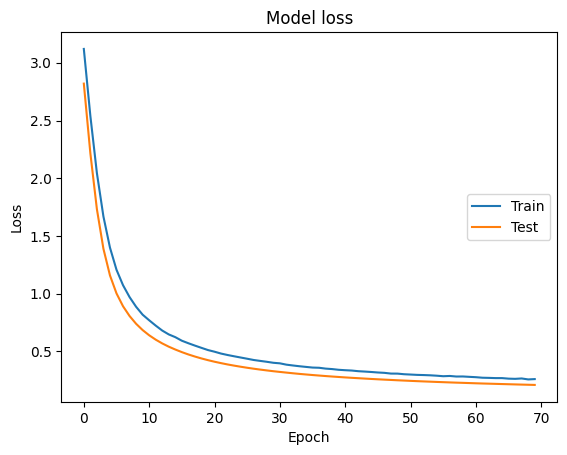

NameError: name 'np' is not defined

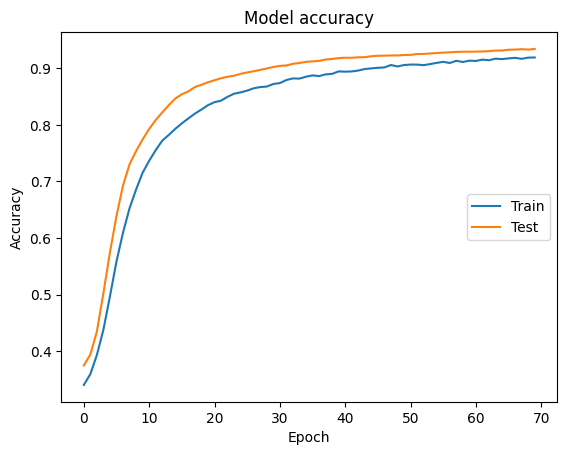

In [42]:
from plot import plot_training_history

plot_training_history(gte5_hist)

Since the number of epochs is 5, this provides low performance as it can further increase as the performance graph shows no signs of performance being constant.

#### Conclusion

- Transfer learning can be used to reuse the pre-trained model on solving tasks with similar features on pre-trained model. This improves generalization as it already learns the features like edges, shapes and textures. Since there is no need to train on solving a new problem, training time is reduced as the model does not need to learn the features again back from scratch.